In [5]:
from pylab import *
from scipy.integrate import *
from mpl_toolkits.mplot3d import Axes3D # modulo para graficar en 3 dimensiones
from matplotlib import cm
%matplotlib inline

In [6]:
from pylab import *
from scipy.integrate import *

In [7]:
def RK_2(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = sol[i,:] + 0.5*delta*edo(sol[i,:],t[i])
        sol[i+1,:] = sol[i,:] + delta*edo(k1,t[i]+0.5*delta)
    return sol

def RK_4(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] + 0.5*delta*k1 , t[i] + 0.5*delta)
        k3 = edo(sol[i,:] + 0.5*delta*k2 , t[i] + 0.5*delta)
        k4 = edo(sol[i,:] + delta*k2 , t[i] + delta)
        sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return sol

$$
\frac{d\theta}{dt}=v_{\theta}
$$

$$
\frac{d\varphi}{dt}=v_{\varphi}
$$

$$
\frac{dv_{\theta}}{dt}=v_{\varphi}^2cos\theta sin\theta-\frac{g}{l}sin\theta
$$

$$
\frac{dv_{\varphi}}{dt}=-2v_{\theta}v_{\varphi}cot\theta
$$

In [8]:
def pendulo_esferico(x,t):
    #𝜃 , 𝜑 ,v𝜃 ,v𝜑,
    #0 , 1 , 2 , 3
    l=1
    g=9.8
    w=g/l
    dtheta=x[2]
    dphi=x[3]
    dvtheta=((x[3])**2)*cos(x[0])*sin(x[0])-(g/l)*sin(x[0])
    dvphi=-(2*x[2]*x[3])/tan(x[0])
    return array([dtheta,dphi,dvtheta,dvphi])


In [9]:
tiempo = linspace(0,2*pi,16)
p_ini = [pi/4,pi,1.0,1.0]
sol_RK2 = RK_2(pendulo_esferico,p_ini,tiempo)
sol_RK4 = RK_4(pendulo_esferico,p_ini,tiempo)
sol_ODEint = odeint(pendulo_esferico,p_ini,tiempo)

<ipython-input-8-85cf91e5311d>:9: RuntimeWarning: overflow encountered in double_scalars
  dvtheta=((x[3])**2)*cos(x[0])*sin(x[0])-(g/l)*sin(x[0])
<ipython-input-8-85cf91e5311d>:10: RuntimeWarning: overflow encountered in double_scalars
  dvphi=-(2*x[2]*x[3])/tan(x[0])
<ipython-input-8-85cf91e5311d>:9: RuntimeWarning: invalid value encountered in cos
  dvtheta=((x[3])**2)*cos(x[0])*sin(x[0])-(g/l)*sin(x[0])
<ipython-input-8-85cf91e5311d>:9: RuntimeWarning: invalid value encountered in sin
  dvtheta=((x[3])**2)*cos(x[0])*sin(x[0])-(g/l)*sin(x[0])
<ipython-input-8-85cf91e5311d>:10: RuntimeWarning: invalid value encountered in tan
  dvphi=-(2*x[2]*x[3])/tan(x[0])
<ipython-input-7-4416ad1a9812>:6: RuntimeWarning: invalid value encountered in add
  k1 = sol[i,:] + 0.5*delta*edo(sol[i,:],t[i])
<ipython-input-7-4416ad1a9812>:19: RuntimeWarning: invalid value encountered in add
  sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)


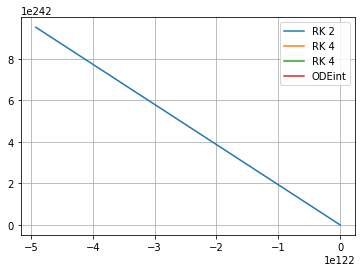

In [19]:
#figure(dpi=150)
plot(sol_RK2[:,0],sol_RK2[:,2],label="RK 2") #theta vs #vtheta
plot(sol_RK4[:,0],sol_RK4[:,2],label="RK 4") #theta vs #vtheta
plot(sol_RK4[:,1],sol_RK4[:,3],label="RK 4") #phi vs #vphi
plot(sol_ODEint[:,0],sol_ODEint[:,2],label="ODEint")
grid(),legend()
show()


NameError: name 'sol' is not defined

C:\Users\x\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


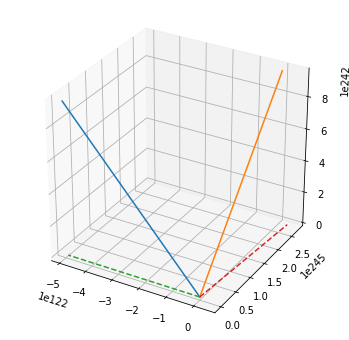

In [11]:
fig = figure(figsize=(6,6))
grafica = fig.add_subplot(111,projection='3d')
plot(sol_RK2[:,0],sol_RK2[:,1],sol_RK2[:,2],sol_RK2[:,3],label='Trayectoria')
plot(sol_RK2[:,0],sol_RK2[:,2],'--',label=r'$v(\theta)vs\theta$')
plot(sol_RK2[:,1],sol_RK2[:,3],'--',label=r'$v(\theta)vs\theta$')
plot([sol[0,0]],[sol[0,1]],[sol[0,2]],'o',label='Inicio',markersize=10)
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
grafica.set_xlabel('X'),grafica.set_ylabel('Y'),grafica.set_zlabel('Z')
show()

<ipython-input-13-71ddba505186>:3: RuntimeWarning: invalid value encountered in sin
  x=sin(sol_RK2[:,0])*cos(sol_RK2[:,1]) #x=sen(theta)cos(phi)
<ipython-input-13-71ddba505186>:3: RuntimeWarning: invalid value encountered in cos
  x=sin(sol_RK2[:,0])*cos(sol_RK2[:,1]) #x=sen(theta)cos(phi)
<ipython-input-13-71ddba505186>:4: RuntimeWarning: invalid value encountered in sin
  y=sin(sol_RK2[:,0])*sin(sol_RK2[:,1])
<ipython-input-13-71ddba505186>:5: RuntimeWarning: invalid value encountered in cos
  z=cos(sol_RK2[:,0])


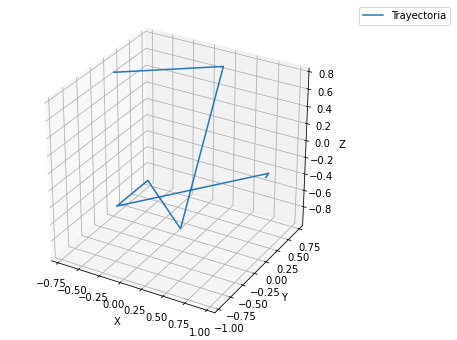

In [13]:
fig = figure(figsize=(6,6))
grafica = fig.add_subplot(111,projection='3d')
x=sin(sol_RK2[:,0])*cos(sol_RK2[:,1]) #x=sen(theta)cos(phi)
y=sin(sol_RK2[:,0])*sin(sol_RK2[:,1])
z=cos(sol_RK2[:,0])
plot(x,y,z,label='Trayectoria')
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
grafica.set_xlabel('X'),grafica.set_ylabel('Y'),grafica.set_zlabel('Z')
show()

<ipython-input-17-71ddba505186>:3: RuntimeWarning: invalid value encountered in sin
  x=sin(sol_RK2[:,0])*cos(sol_RK2[:,1]) #x=sen(theta)cos(phi)
<ipython-input-17-71ddba505186>:3: RuntimeWarning: invalid value encountered in cos
  x=sin(sol_RK2[:,0])*cos(sol_RK2[:,1]) #x=sen(theta)cos(phi)
<ipython-input-17-71ddba505186>:4: RuntimeWarning: invalid value encountered in sin
  y=sin(sol_RK2[:,0])*sin(sol_RK2[:,1])
<ipython-input-17-71ddba505186>:5: RuntimeWarning: invalid value encountered in cos
  z=cos(sol_RK2[:,0])


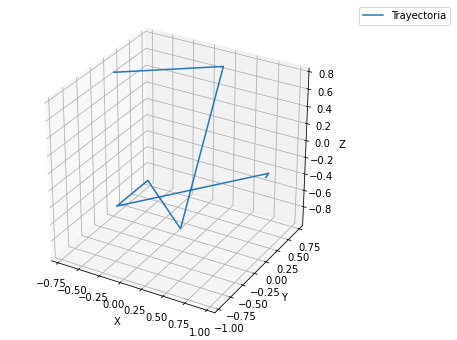

In [17]:
fig = figure(figsize=(6,6))
grafica = fig.add_subplot(111,projection='3d')
x=sin(sol_RK2[:,0])*cos(sol_RK2[:,1]) #x=sen(theta)cos(phi)
y=sin(sol_RK2[:,0])*sin(sol_RK2[:,1])
z=cos(sol_RK2[:,0])
plot(x,y,z,label='Trayectoria')
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
grafica.set_xlabel('X'),grafica.set_ylabel('Y'),grafica.set_zlabel('Z')
show()


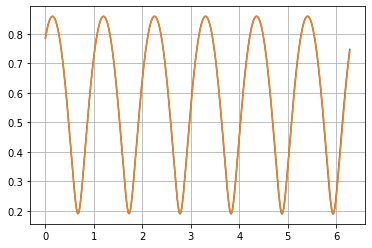

In [52]:
tiempo = arange(0,2*pi,0.01)
sol_num_rk2 = RK_2(pendulo_esferico,p_ini,tiempo)
#sol_num_rk4 = RK_4(pendulo_esferico,p_ini,tiempo)
plot(tiempo,sol_num_rk2[:,0]) #tiempo vs theta
plot(tiempo,sol_num_rk4[:,0]) #tiempo vs theta
grid()
show()

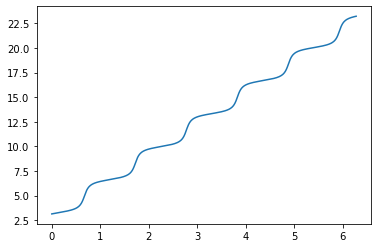

In [50]:
plot(tiempo,sol_num_rk2[:,1]) #tiempo vs phi